# Exploring PM1.0 Number Concentrations

In [ ]:
import os 
os.chdir('../src')

In [84]:
%load_ext autoreload

In [85]:
%autoreload 1

## Importing csvs into dataframes

In [ ]:
import pandas as pd

In [62]:
parent_dir = '../data/raw/number'
filepaths = [parent_dir+'\\'+filename for filename in os.listdir(parent_dir)]
dataframes = [pd.read_csv(filepath, index_col=0) for filepath in filepaths]

In [63]:
for count, df in enumerate(dataframes):
    dataframes[count].index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S %Z')

## Analysis

In [94]:
from sensors.common.outliers_remover import remove_outlier
dataframes2 = [remove_outlier(df,'>=0.3um/dl') for df in dataframes]
dataframes2 = [df.resample('2W').mean() for df in dataframes]

## Plotting

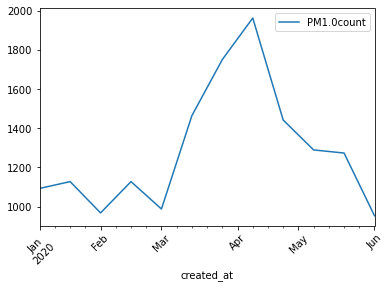

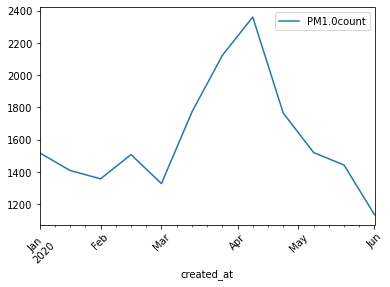

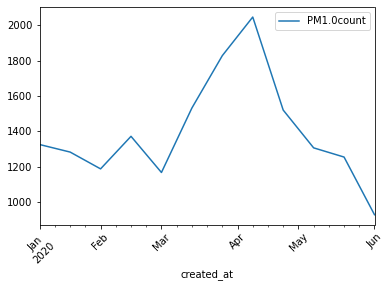

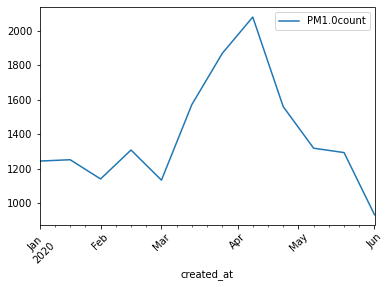

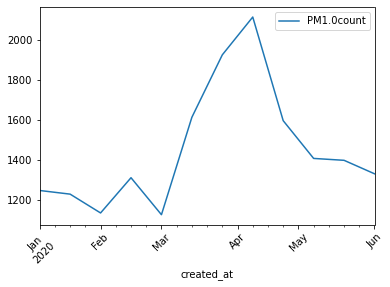

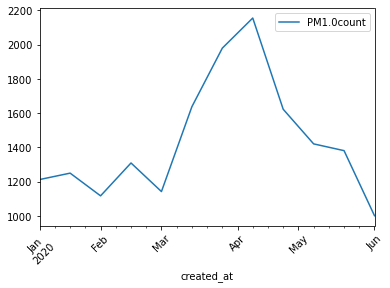

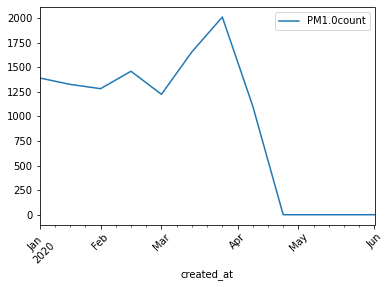

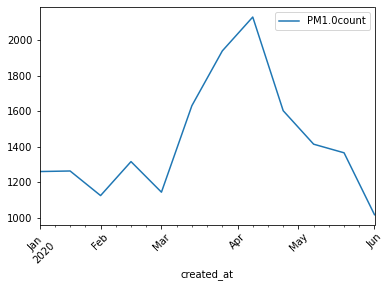

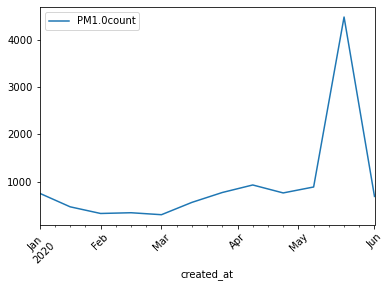

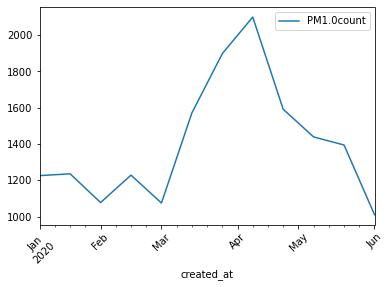

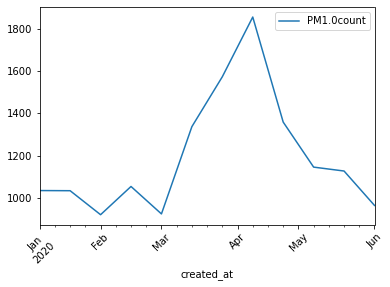

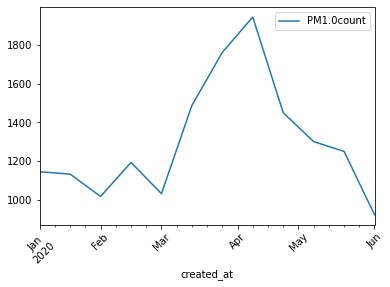

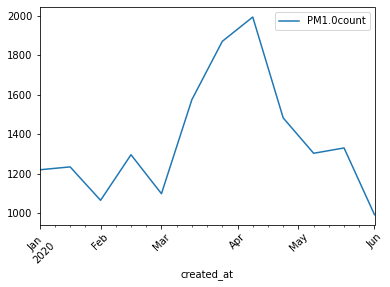

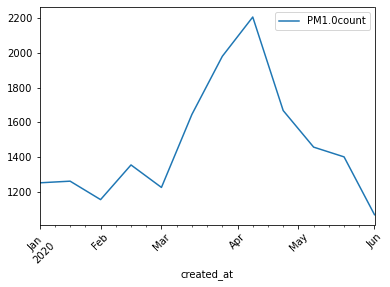

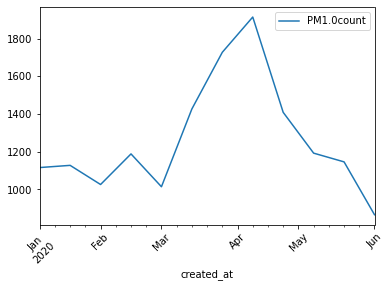

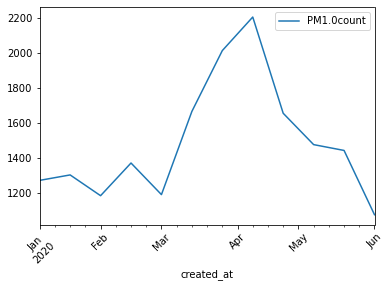

In [95]:
for df in dataframes2:
    df['PM1.0count'] = df['>=0.3um/dl']-df['>1.0um/dl']
    df.plot(y='PM1.0count', rot=45)